# __Import__

In [3]:
import glob
import os
import random
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


with open('../../config/config.json', 'r') as file:
    config = json.load(file)

# __Data Loading__

In [4]:
def load_data(path, k=100):
    random.seed(42)
    all_files = glob.glob(os.path.join(path, "*.csv"))
    samples = random.sample(all_files, k=k)

    li = []

    for i, filename in enumerate(samples):
        df = pd.read_csv(filename, sep=";")
        df["Sensor"] = i
        df = df.set_index(keys="Sensor", drop=True)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=False)

    return df
data_dir = config["data_path"]
path = f"../../data/{data_dir}"
df = load_data(path = path, k=100)

In [31]:
df.columns, df.shape

(Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
        '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
        '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
        'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
        'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
        'total_et', 'prec', 'volsw_123', 'volsw_4'],
       dtype='object'),
 (1424400, 25))

# __Null Value Analysis__

In [32]:
df.isna().sum()

YYYY                       0
MM                         0
DD                         0
DOY                        0
2m_temp_max                0
2m_temp_mean               0
2m_temp_min                0
2m_dp_temp_max             0
2m_dp_temp_mean            0
2m_dp_temp_min             0
10m_wind_u                 0
10m_wind_v                 0
fcst_alb                   0
lai_high_veg               0
lai_low_veg                0
swe                        0
surf_net_solar_rad_max     0
surf_net_solar_rad_mean    0
surf_net_therm_rad_max     0
surf_net_therm_rad_mean    0
surf_press                 0
total_et                   0
prec                       0
volsw_123                  0
volsw_4                    0
dtype: int64

No missing values

# __Statistical Analysis__

__Correlations__

<Axes: >

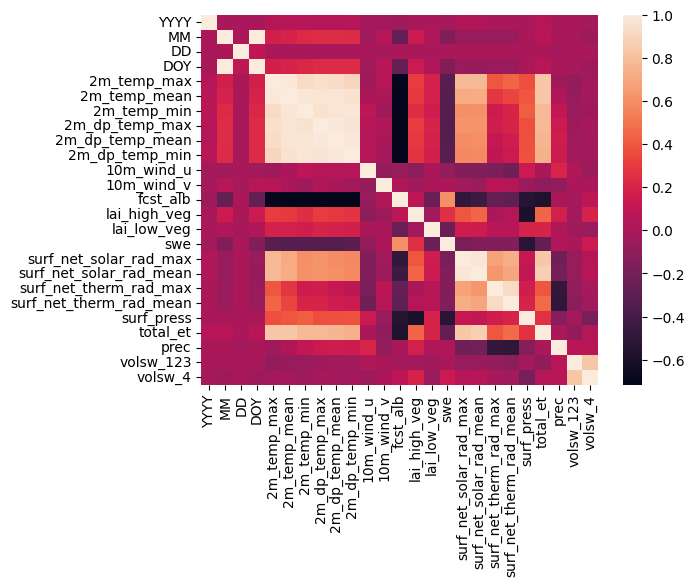

In [33]:
sns.heatmap(df.corr())

## __Data Distributions__

### __Precipitation by Sensors from 1981 - 2019__

C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_17412\111590394.py:8: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(yearly_sensors, x="YYYY", y="prec", hue="Sensor", palette=["#d1d6de"], legend=None, linewidth=0.5) # ["#808080"] , "#dcdfe3"
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

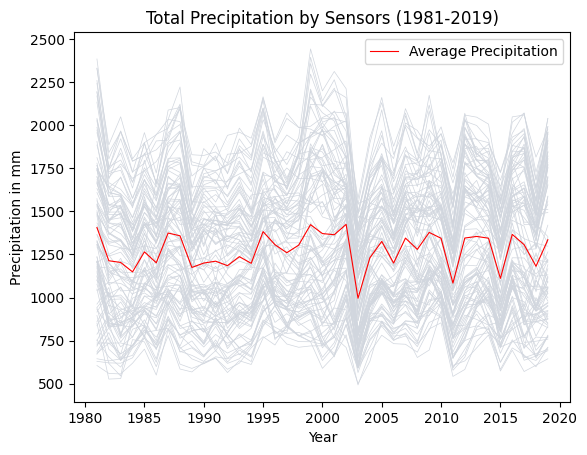

In [34]:
# sensor prec by year
yearly_sensors = df.groupby(["YYYY","Sensor"]).sum()
yearly_sensors = yearly_sensors["prec"].reset_index()

# average sensor prec by year
yearly_sensor_avg = df.groupby(["YYYY","Sensor"])["prec"].sum().groupby("YYYY").mean().reset_index()

sns.lineplot(yearly_sensors, x="YYYY", y="prec", hue="Sensor", palette=["#d1d6de"], legend=None, linewidth=0.5) # ["#808080"] , "#dcdfe3"
sns.lineplot(yearly_sensor_avg, x="YYYY", y="prec", color="red", label="Average Precipitation", legend=True, linewidth=0.8)
plt.ylabel("Precipitation in mm")
plt.xlabel("Year")
plt.title("Total Precipitation by Sensors (1981-2019)")
plt.show()

### __Average Precipiation by Month (1981 - 2019)__

average per month across the sensors

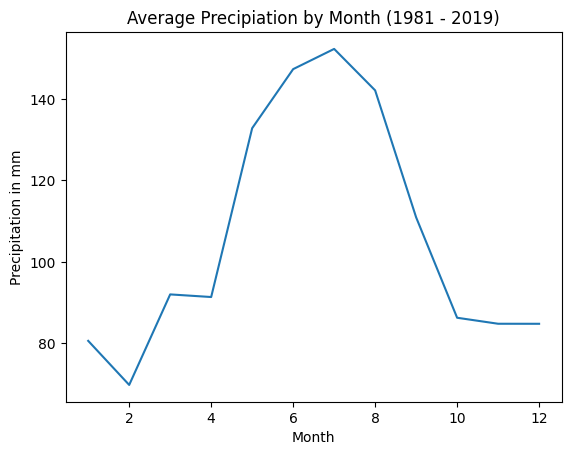

In [35]:
monthly_avg = df.groupby(['YYYY', 'MM', 'Sensor'])["prec"].sum().groupby("MM").mean()

plt.plot(monthly_avg)
plt.title("Average Precipiation by Month (1981 - 2019)")
plt.ylabel("Precipitation in mm")
plt.xlabel("Month")
plt.show()

### __Total Precipiation by Year (1981 - 2019)__
total prec of all sensors by year

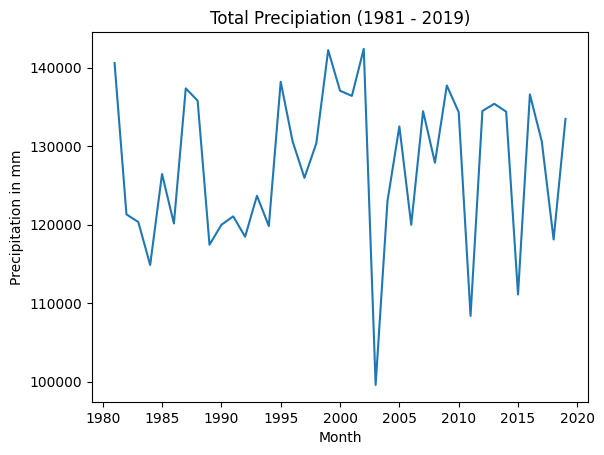

In [36]:
yearly_sum = df.groupby(['YYYY', 'MM'])["prec"].sum()
yearly_sum_avg = yearly_sum.groupby('YYYY').sum()

plt.plot(yearly_sum_avg)
plt.title("Total Precipiation (1981 - 2019)")
plt.ylabel("Precipitation in mm")
plt.xlabel("Month")
plt.show()

# __Preprocessing__

## __Cyclic Encoding__

In [37]:
df['MM_sin'] = np.sin(2 * np.pi * df['MM']/12.0)
df['MM_cos'] = np.cos(2 * np.pi * df['MM']/12.0)

df['DOY_sin'] = np.sin(2 * np.pi * df['DOY']/365.0)
df['DOY_cos'] = np.cos(2 * np.pi * df['DOY']/365.0)

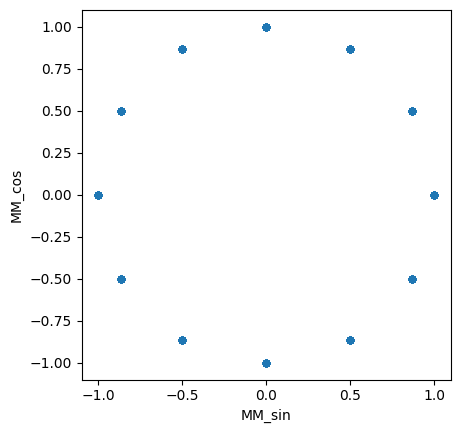

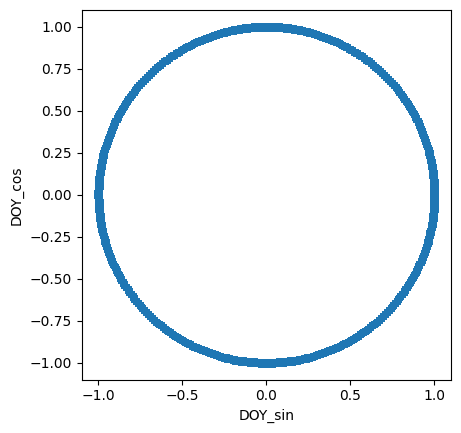

In [38]:
ax = df.plot.scatter('MM_sin', 'MM_cos').set_aspect('equal')
ax = df.plot.scatter('DOY_sin', 'DOY_cos').set_aspect('equal')

## __Set Multi-Index__

In [39]:
df = df.reset_index()
df = df.set_index([df["YYYY"].rename("Year"), df["MM"].rename("Month"), df["DD"].rename("Day"), df["Sensor"]], drop=True)
df = df.drop(columns=["MM", "DD", "DOY", "Sensor"], axis=1)
df = df.sort_index()
df.head()

YYYY  2m_temp_max  2m_temp_mean  2m_temp_min  \
Year Month Day Sensor                                                 
1981 1     1   0       1981          4.1           1.8         -0.8   
               1       1981         -2.0          -4.9         -8.9   
               2       1981         -4.3          -8.2        -10.9   
               3       1981         -8.0          -9.9        -12.7   
               4       1981          6.1           3.6          0.3   

                       2m_dp_temp_max  2m_dp_temp_mean  2m_dp_temp_min  \
Year Month Day Sensor                                                    
1981 1     1   0                  0.4             -2.0            -4.2   
               1                 -4.1             -8.0           -12.4   
               2                 -9.1            -12.8           -16.3   
               3                -10.3            -13.8           -17.9   
               4                  0.7             -2.9            -6.0   

                       10m_wind_u  10m_wind_v  fcst_alb  ...  \
Year Month Day Sensor                                    ...   
1981 1     1   0              6.4        -0.2      0.15  ...   
               1              2.1        -0.1      0.39  ...   
               2              1.1        -0.4      0.49  ...   
               3              0.1        -0.6      0.53  ...   
               4              6.4        -0.7      0.13  ...   

                       surf_net_therm_rad_mean  surf_press  total_et   prec  \
Year Month Day Sensor                                                         
1981 1     1   0                            42     96443.0      0.93   3.84   
               1                            28     88978.0     -0.06  13.40   
               2                            25     80890.0     -0.10   7.10   
               3                            14     79312.0     -0.07   4.23   
               4                            62     97288.0      0.77   0.51   

                       volsw_123  volsw_4  MM_sin    MM_cos   DOY_sin  \
Year Month Day Sensor                                                   
1981 1     1   0            0.45     0.45     0.5  0.866025  0.017213   
               1            0.34     0.40     0.5  0.866025  0.017213   
               2            0.33     0.39     0.5  0.866025  0.017213   
               3            0.42     0.47     0.5  0.866025  0.017213   
               4            0.38     0.34     0.5  0.866025  0.017213   

                        DOY_cos  
Year Month Day Sensor            
1981 1     1   0       0.999852  
               1       0.999852  
               2       0.999852  
               3       0.999852  
               4       0.999852  

[5 rows x 26 columns]

## __Scale Data__

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
exclude_columns = ['YYYY','MM_sin', 'MM_cos', 'DOY_sin','DOY_cos', 'prec']

# Columns to scale
scale_columns = df.columns.difference(exclude_columns)

scaler = StandardScaler()
df[scale_columns] = scaler.fit_transform(df[scale_columns])

min_max_scaler = MinMaxScaler()
df["YYYY"] = min_max_scaler.fit_transform(df["YYYY"].values.reshape(-1, 1))

df

YYYY  2m_temp_max  2m_temp_mean  2m_temp_min  \
Year Month Day Sensor                                                 
1981 1     1   0        0.0    -0.648490     -0.463748    -0.291012   
               1        0.0    -1.321493     -1.243249    -1.265721   
               2        0.0    -1.575248     -1.627182    -1.506390   
               3        0.0    -1.983463     -1.824966    -1.722992   
               4        0.0    -0.427833     -0.254330    -0.158644   
...                     ...          ...           ...          ...   
2019 12    31  95       1.0    -0.394734     -0.719704    -0.627948   
               96       1.0    -0.494030     -0.580092    -0.411346   
               97       1.0    -0.670555     -1.161808    -1.458256   
               98       1.0    -1.034639     -1.208346    -1.265721   
               99       1.0    -1.376657     -1.382861    -1.181487   

                       2m_dp_temp_max  2m_dp_temp_mean  2m_dp_temp_min  \
Year Month Day Sensor                                                    
1981 1     1   0            -0.513348        -0.504444       -0.435857   
               1            -1.081585        -1.241181       -1.386040   
               2            -1.712959        -1.830571       -1.837956   
               3            -1.864489        -1.953360       -2.023358   
               4            -0.475465        -0.614954       -0.644434   
...                               ...              ...             ...   
2019 12    31  95           -0.488093        -0.897370       -1.200638   
               96           -0.538603        -0.688628       -0.702372   
               97           -0.879545        -1.192065       -1.339690   
               98           -1.195232        -1.302576       -1.501916   
               99           -1.523547        -1.535876       -1.409215   

                       10m_wind_u  10m_wind_v  fcst_alb  ...  \
Year Month Day Sensor                                    ...   
1981 1     1   0         4.287671   -0.253137 -0.633901  ...   
               1         1.207852   -0.161262  1.009086  ...   
               2         0.491616   -0.436886  1.693663  ...   
               3        -0.224621   -0.620636  1.967494  ...   
               4         4.287671   -0.712511 -0.770816  ...   
...                           ...         ...       ...  ...   
2019 12    31  95        0.348368   -0.804386 -0.360070  ...   
               96        0.133497    0.298112 -0.770816  ...   
               97       -0.224621    0.849361  0.735255  ...   
               98        0.491616   -0.253137  1.009086  ...   
               99       -0.081374   -0.896261  2.515156  ...   

                       surf_net_therm_rad_mean  surf_press  total_et   prec  \
Year Month Day Sensor                                                         
1981 1     1   0                     -0.326210    1.001828 -0.382203   3.84   
               1                     -0.965251   -0.213570 -1.122410  13.40   
               2                     -1.102188   -1.530401 -1.152317   7.10   
               3                     -1.604292   -1.787320 -1.129887   4.23   
               4                      0.586706    1.139404 -0.501832   0.51   
...                                        ...         ...       ...    ...   
2019 12    31  95                     0.267186   -0.096508 -1.062595   0.00   
               96                     0.769289    0.800265 -1.047641   0.00   
               97                    -0.143626   -0.703474 -1.107456   0.00   
               98                     0.084603   -0.541313 -1.017734   0.00   
               99                    -0.600084   -1.366774 -1.099979   0.00   

                       volsw_123   volsw_4        MM_sin    MM_cos  \
Year Month Day Sensor                                                
1981 1     1   0        1.601643  1.351390  5.000000e-01  0.866025   
               1       -0.378118  0.295988  5.000000e-01  0.86602

# __Save Data__

In [41]:
df.to_csv("../../output/data.csv", sep=";", index=True)